In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [19]:
dataset = fetch_california_housing()

In [39]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [21]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [22]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [23]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df, dataset.target, test_size=0.2, random_state=0, shuffle=False)

In [25]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
16507,4.4213,11.0,7.345936,1.132325,1605.0,3.034026,37.74,-121.11
16508,3.3578,35.0,5.450000,0.973529,958.0,2.817647,37.80,-121.10
16509,4.1833,22.0,6.564232,1.035264,1252.0,3.153652,37.76,-121.11
16510,3.4426,7.0,5.416393,1.028415,3006.0,3.285246,37.73,-121.16


In [26]:
X_test.iloc[3,1]

np.float64(37.0)

In [27]:
y_train.mean()

np.float64(2.02067031310562)

In [28]:
np.median(y_test)

np.float64(2.1475)

#### If we use StandardScaler for preprocessing and LinearRegression for fitting the model with training set obtained in previous questions, what are the coefficients obtained in the predicted model?


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [30]:
# Scale X_train
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)

# Scale y_train separately
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))  # Ensure 2D

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X=X_train_scaled,y=y_train_scaled)

LinearRegression()

In [33]:
# Transform X_test using the same X_scaler
X_test_scaled = X_scaler.transform(X_test)

# Transform y_test using the same y_scaler
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))  # Ensure 2D

In [34]:
lr.coef_

array([[ 0.73835333,  0.10599086, -0.28308489,  0.32114655, -0.00150347,
        -0.03985752, -0.77514197, -0.72792486]])

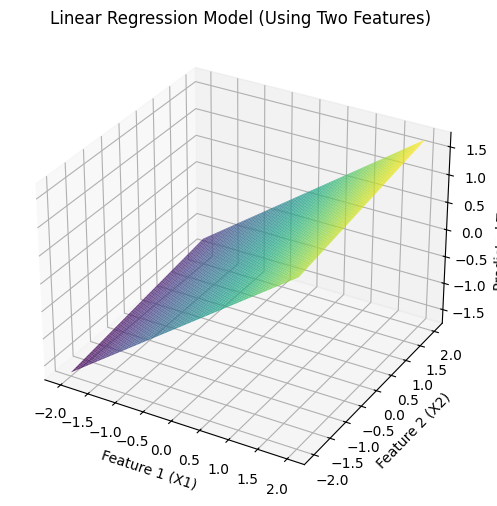

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select two features (e.g., x1 and x2)
x1 = np.linspace(-2, 2, 100)  # Adjust range based on your data
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute predicted y using only two features
b = lr.intercept_  # Get intercept
y_pred = (0.738 * X1 + 0.106 * X2 + b)  # Ignoring other features for visualization

# Plot the 3D surface
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, cmap='viridis', alpha=0.8)

# Labels
ax.set_xlabel("Feature 1 (X1)")
ax.set_ylabel("Feature 2 (X2)")
ax.set_zlabel("Predicted Target (Y)")
plt.title("Linear Regression Model (Using Two Features)")
plt.show()

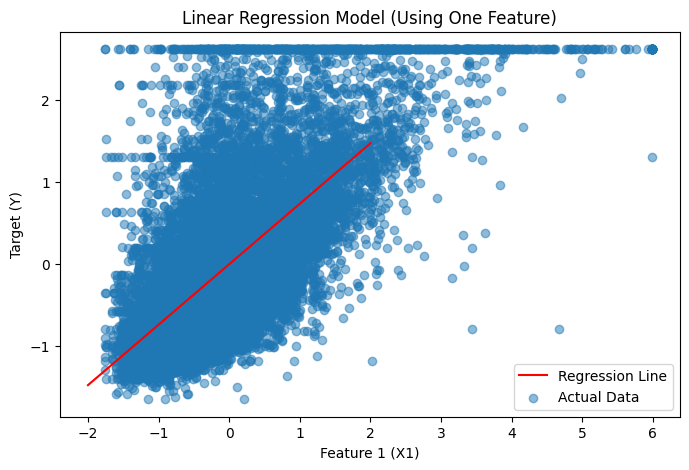

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Select one feature (e.g., x1)
X1 = np.linspace(-2, 2, 100).reshape(-1, 1)  # Generate X values
y_pred = 0.738 * X1 + lr.intercept_  # Compute predicted Y

# Plot
plt.figure(figsize=(8,5))
plt.plot(X1, y_pred, color='red', label="Regression Line")
plt.scatter(X_train_scaled[:, 0], y_train_scaled, alpha=0.5, label="Actual Data")  # Scatter plot of real data
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Target (Y)")
plt.title("Linear Regression Model (Using One Feature)")
plt.legend()
plt.show()


In [40]:
lr.intercept_

array([-5.3243323e-15])